# <원래 올렸던 코드에서 추가적으로 구한 것들>

In [20]:
import pandas as pd

# 그래프, 한글 설정
# 출처 : https://wikidocs.net/4767
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 칼럼이름, 값이름 변경한 csv 파일 가져옴
# EUC-KR 은 KS X 1001와 KS X 1003을 사용하는 8비트 문자 인코딩, EUC의 일종이며 대표적인 한글 완성형 인코딩임
# 해당 파일 오류가 나서 euc-kr로 설정
shopping = pd.read_csv('new_shopping.csv', encoding = 'euc-kr')
notshopping = pd.read_csv('new_notshopping.csv', encoding = 'euc-kr')

In [21]:
# 남자만
male = shopping[shopping['성별'] == 1]
n_male = notshopping[notshopping['성별'] == 1]

#여자만
female = shopping[shopping['성별'] == 2]
n_female = notshopping[notshopping['성별'] == 2]

## shopping - 업종 영수증 번호 중복삭제 후 다시 구해봄

In [22]:
# 총이용횟수 구하기위해서는 영수증 똑같은 번호 중복삭제
df = shopping.drop_duplicates(subset=['ID', '영수증번호'], keep='first')
df_m = male.drop_duplicates(subset=['ID', '영수증번호'], keep='first')
df_f = female.drop_duplicates(subset=['ID', '영수증번호'], keep='first')

In [23]:
def count(gender_age, criteria):
    return gender_age[criteria].value_counts()

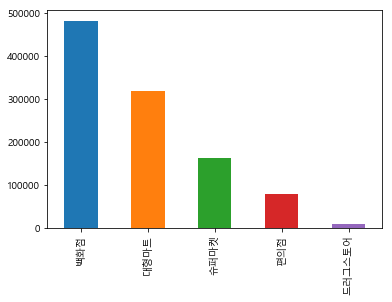

In [24]:
count(df, '업종').plot(kind='bar')

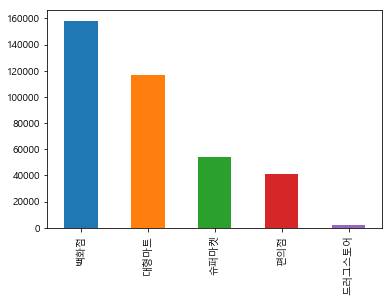

In [25]:
count(df_m, '업종').plot(kind='bar')

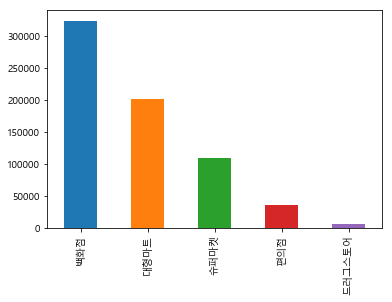

In [26]:
count(df_f, '업종').plot(kind='bar')

## ID와 업종별로 그룹화 ->  고객별 업종 이용횟수와 총구매액
### 1. shopping

In [27]:
## 총구매액 구하는 df
df_sum = shopping.groupby(['ID', '업종'])

# 필요한 컬럼만 선택
df_sum = df_sum['ID', '업종', '구매금액']

# 모두 더해줌
df_sum = df_sum.sum()

# 필요없는 컬럼 삭제
df_sum = df_sum.drop(columns=['ID'])

In [28]:
# ID와 업종별로 그룹화
df = df.groupby(['ID', '업종'])

# 필요한 컬럼만 선택
df = df['ID', '업종', '구매금액']

# 이용횟수 구하기위해 요소별 카운트
df2 = df.count()

# 필요없는 컬럼 삭제
df2 = df2.drop(columns=['구매금액', 'ID'])

In [31]:
# ID별로 그룹화하여 각 고객별 어떤 업종 몇번 이용했는지, 그 업종에 대해 총구매액은 얼마인지
id_biz = pd.concat([df2, df_sum], axis = 1)

# 업종 이용횟수를 나타내는 컬럼이름으로 변경
id_biz = id_biz.rename(columns={'업종':'업종이용횟수'})

In [33]:
# csv 파일로 저장 (저장시 한글깨짐현상 있어서 인터넷 검색 후 encoding='ms949' 해줌)
id_biz.to_csv("id_biz.csv", encoding='ms949')

In [40]:
# 완성된 df 20줄만 보여줌
id_biz.head(20)

업종이용횟수      구매금액
ID 업종                    
1  대형마트       1     72000
   백화점       42   3623930
2  대형마트      49   1755192
   백화점        5    206400
3  대형마트      10    564804
   백화점       19   1693700
   슈퍼마켓       3     14380
4  대형마트      60   2233956
   백화점       60   5721760
   편의점        2     14400
6  대형마트     158   5302558
   백화점        4    161500
   슈퍼마켓      68    810146
   편의점       49    146850
7  대형마트       3     67180
   백화점       47   2583700
8  대형마트      14   1241913
   백화점       45   6393290
9  백화점       69  11095910
   슈퍼마켓       3    146056

In [41]:
# 총 구매액 높은 고객 순서 상위 20개만
id_biz.sort_values(by='구매금액', ascending=False).head(20)

,,업종이용횟수,구매금액
ID,업종,,
13087,백화점,92,610457550
7278,백화점,105,341419190
2807,백화점,70,321684430
9038,백화점,116,305870390
6663,백화점,156,284475670
2363,백화점,79,271247000
3020,백화점,236,263288320
7039,백화점,217,238833290
11447,백화점,57,229759930


In [42]:
# 업종 이용횟수 높은 고객 순서 상위 20개만
id_biz.sort_values(by='업종이용횟수', ascending=False).head(20)

,,업종이용횟수,구매금액
ID,업종,,
16742,편의점,1192,13092690
12178,슈퍼마켓,888,10610389
4500,편의점,775,3256490
15260,편의점,548,1362100
9677,대형마트,537,20617002
4209,슈퍼마켓,493,11299994
16878,슈퍼마켓,482,6276953
5264,대형마트,482,10896004
8929,슈퍼마켓,474,7044267


### 2. notshopping

In [36]:
# ID와 업종별로 그룹화
n_df = notshopping.groupby(['ID', '업종'])

# 필요한 컬럼만 선택
n_df = n_df['업종', '이용금액']

# 총구매금액 구하기위한 df
n_df_sum = n_df.sum()

# 업종 이용횟수 구하기위한 df
n_df_biz = n_df.count()

# 필요없는 컬럼 삭제
n_df_biz = n_df_biz.drop(columns='이용금액')

# ID별로 그룹화하여 각 고객별 어떤 업종 몇번 이용했는지, 그 업종에 대해 총구매액은 얼마인지
n_id_biz = pd.concat([n_df_biz, n_df_sum], axis = 1)

# 업종 이용횟수를 나타내는 컬럼이름으로 변경
n_id_biz = n_id_biz.rename(columns={'업종':'업종이용횟수'})

In [43]:
# csv 파일로 저장 (저장시 한글깨짐현상 있어서 인터넷 검색 후 encoding='ms949' 해줌)
n_id_biz.to_csv("n_id_biz.csv", encoding='ms949')

In [46]:
# 완성된 df 20줄만
n_id_biz.head(20)

업종이용횟수    이용금액
ID 업종                   
1  면세점         4  948848
   영화관         2   21500
   카페          3   29400
   테마파크        1   58000
2  면세점         1  195353
   카페          3   25300
   패스트푸드       1    7400
3  면세점         1  569683
   카페          2   18300
4  면세점         2  238203
   영화관         2   51000
   카페          1    9200
   테마파크        2   32200
   패스트푸드       8   90500
5  면세점         1  708645
6  영화관         2   20000
   카페          2   28200
   테마파크        1   93100
   패스트푸드      11  343400
7  영화관         4   50000

In [47]:
# 총 구매액 높은 고객 순서 상위 20개
n_id_biz.sort_values(by='이용금액', ascending=False).head(20)

,,업종이용횟수,이용금액
ID,업종,,
16002,면세점,12,358939042
6531,호텔,11,158390500
6207,호텔,13,143470090
1522,호텔,8,76893497
291,면세점,12,65002927
14858,호텔,12,56635200
1497,호텔,5,50524325
13014,호텔,5,45173600
483,면세점,7,43693810


In [48]:
# 업종 이용횟수 높은 고객 순서 상위 20개
n_id_biz.sort_values(by='업종이용횟수', ascending=False).head(20)

,,업종이용횟수,이용금액
ID,업종,,
6693,영화관,24,903500
5663,영화관,23,834000
466,영화관,23,747800
2086,영화관,22,554700
1559,영화관,22,447500
9421,영화관,22,830500
15033,영화관,22,579000
7849,영화관,22,362500
14811,영화관,22,1361000
